In [1]:
import nilearn

In [2]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

In [3]:
import pandas

In [4]:
subj_idx = '01'
run = '02'

In [5]:
import os

In [6]:
import nibabel as nb
atlas_im = nb.load(atlas_filename)

In [7]:
path = os.path.join(os.environ['HOME'], 'data/openfmri/ds008/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-stopsignal'.format(**locals()))

data = path + '_run-{}_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'.format(run)

confounds = path + '_run-{}_bold_confounds.tsv'.format(run)

confounds = pandas.read_csv(confounds, sep='\t', na_values='n/a').fillna(method='bfill')

from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_im, standardize=True, memory='nilearn_cache')

time_series = masker.fit_transform(data, confounds=confounds.values)

/home/ubuntu/miniconda2/lib/python2.7/site-packages/nilearn/_utils/cache_mixin.py:248: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "
/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

(0, 100)

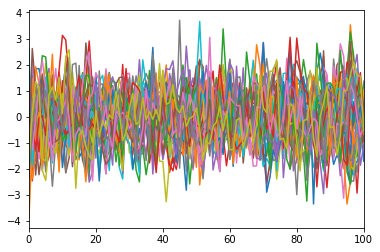

In [10]:
_ = plt.plot(time_series)
plt.xlim(0, 100)

In [11]:
# This code makes a connectivity matrix using a set of timeseries
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

/home/ubuntu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
def plot_correlation_matrix(correlation_matrix):
    # Display the correlation matrix
    import numpy as np
    from matplotlib import pyplot as plt
    plt.figure(figsize=(10, 10))
    # Mask out the major diagonal
    np.fill_diagonal(correlation_matrix, 0)
    plt.imshow(correlation_matrix, interpolation="nearest", cmap="RdBu_r",
               vmax=0.9, vmin=-0.9)
    plt.colorbar()
    # And display the labels
    x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
    y_ticks = plt.yticks(range(len(labels)), labels)

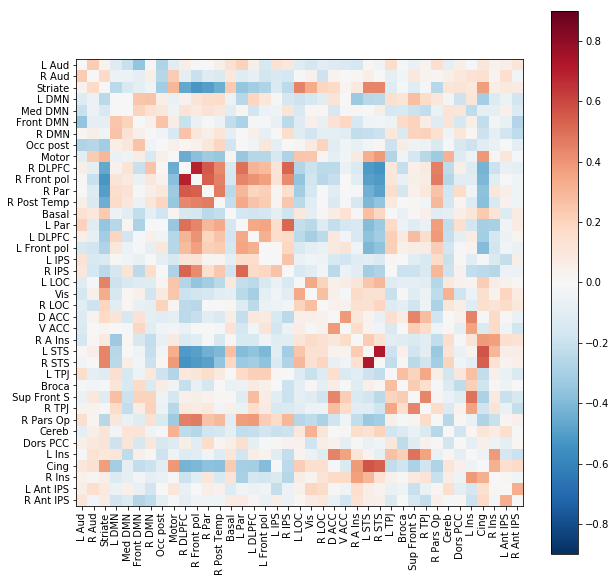

In [13]:
# Here we plot it
plot_correlation_matrix(correlation_matrix)

In [14]:
from nilearn import plotting
import numpy as np


/home/ubuntu/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [15]:
coords_connectome = [plotting.find_xyz_cut_coords(img) for img in nilearn.image.iter_img(atlas_im)]

/home/ubuntu/miniconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/ubuntu/miniconda2/lib/python2.7/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \


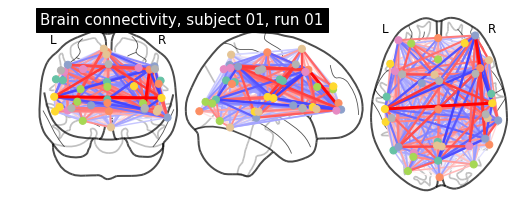

In [16]:
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01')

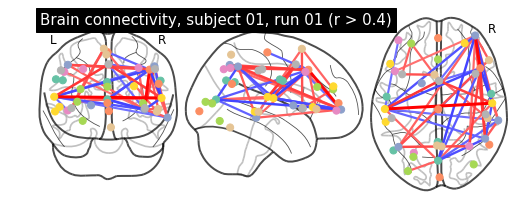

In [17]:
correlation_matrix = np.ma.masked_array(correlation_matrix, np.abs(correlation_matrix) < 0.4)
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01 (r > 0.4)')

In [18]:
import matplotlib.pyplot as plt

In [19]:
subjects = ['%02d' % i for i in range(1, 16)]
subjects.pop(7)

'08'

Working on subject 01


/home/ubuntu/miniconda2/lib/python2.7/site-packages/nilearn/input_data/base_masker.py:98: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_maps_masker_extractor'
  memory_level=memory_level)(imgs)


Working on subject 02
Working on subject 03
Working on subject 04
Working on subject 05
Working on subject 06
Working on subject 07
Working on subject 09
Working on subject 10
Working on subject 11
Working on subject 12
Working on subject 13
Working on subject 14
Working on subject 15


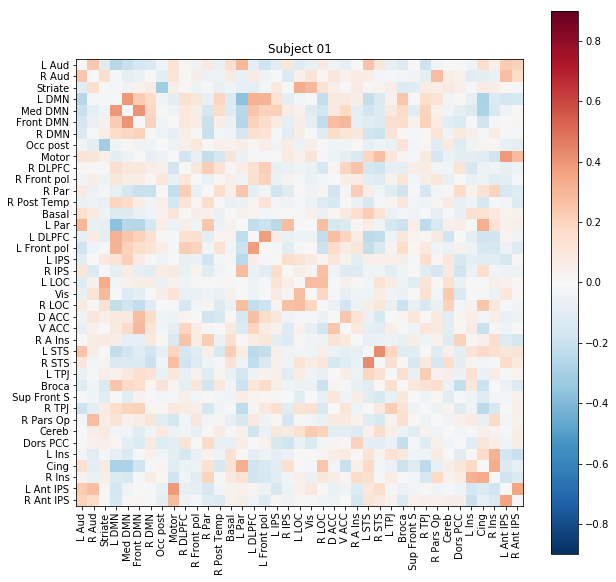

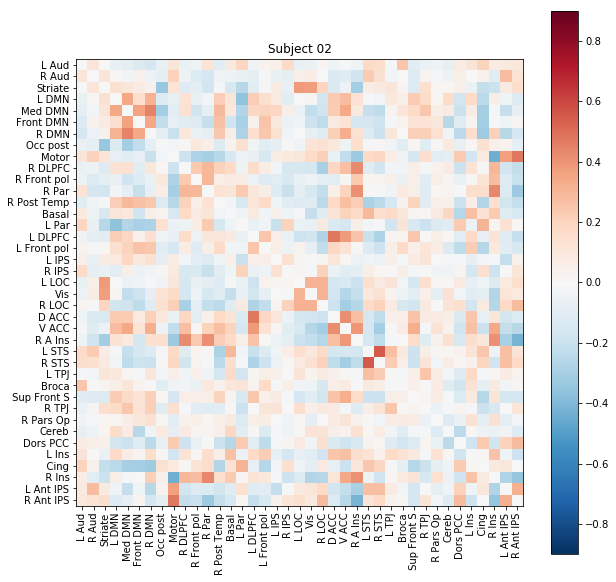

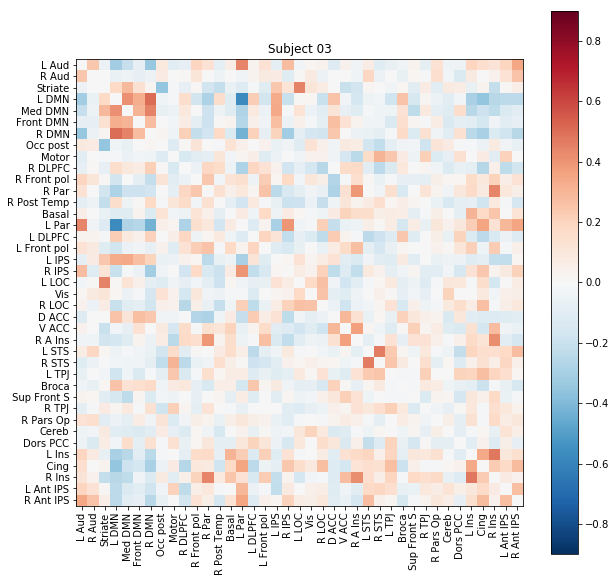

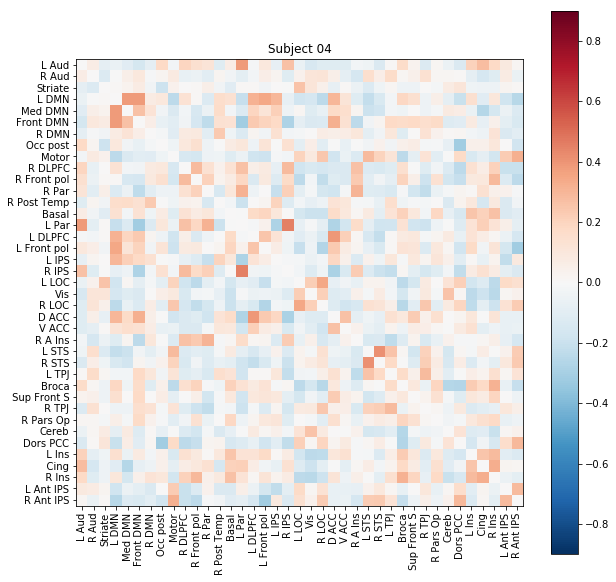

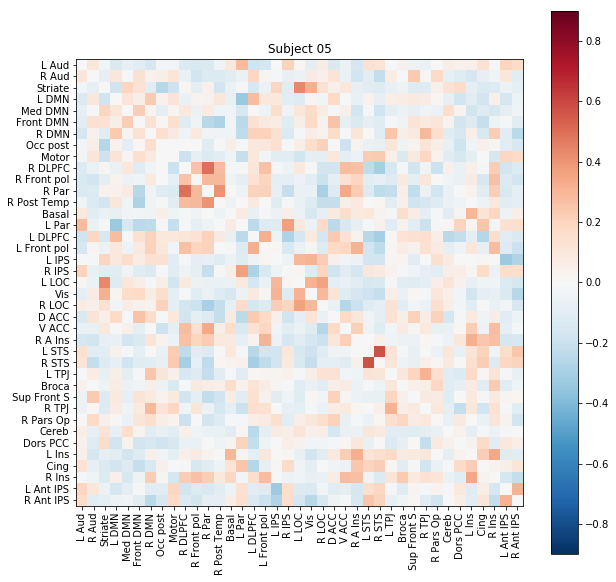

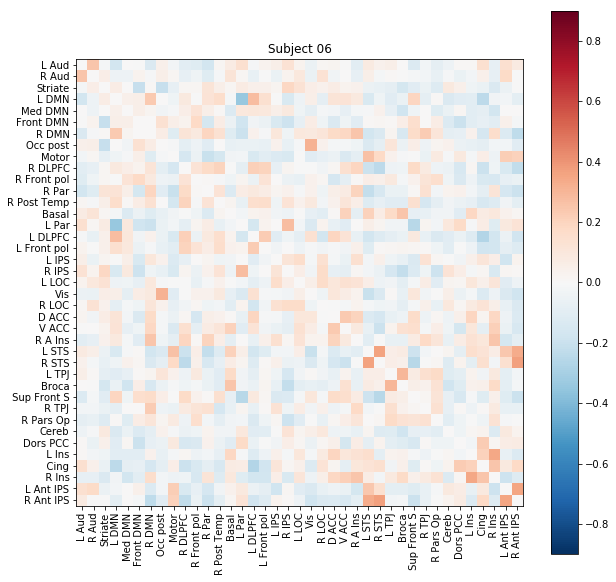

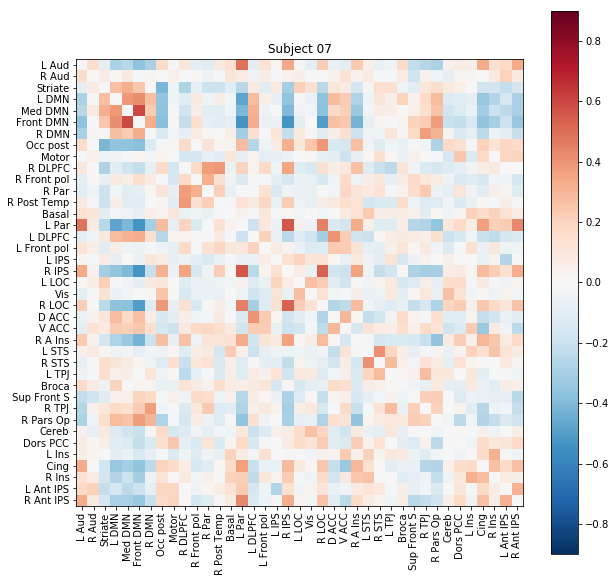

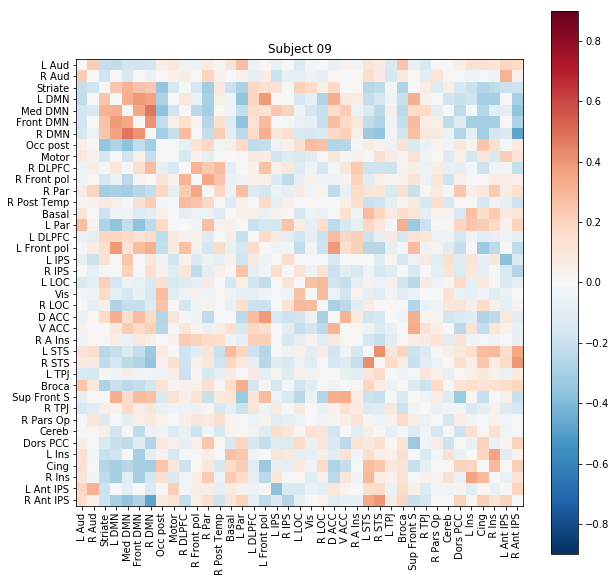

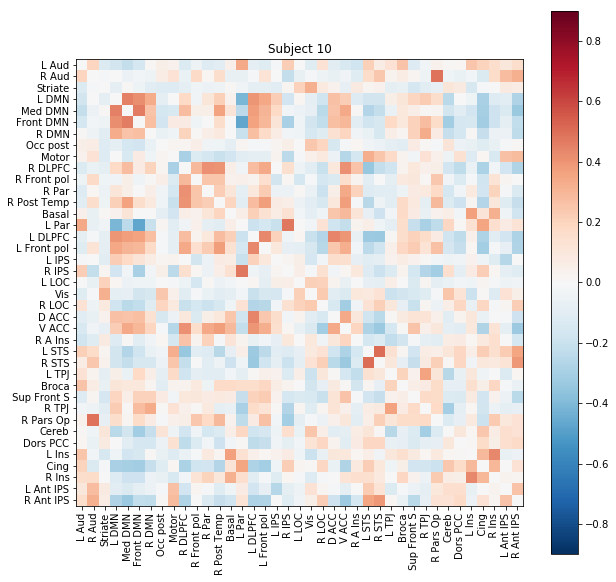

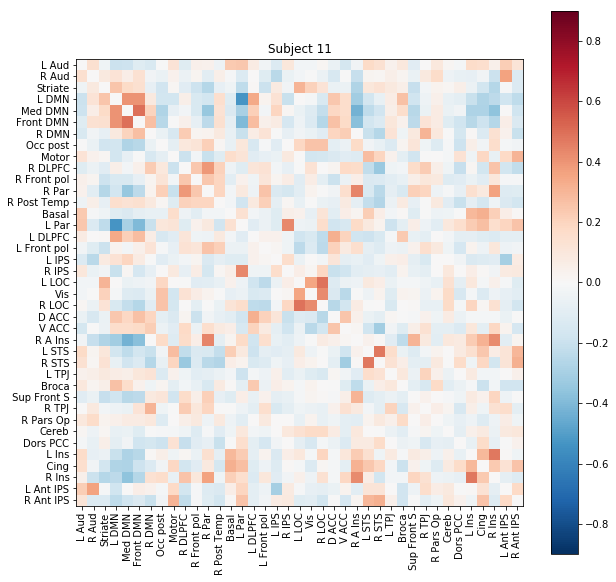

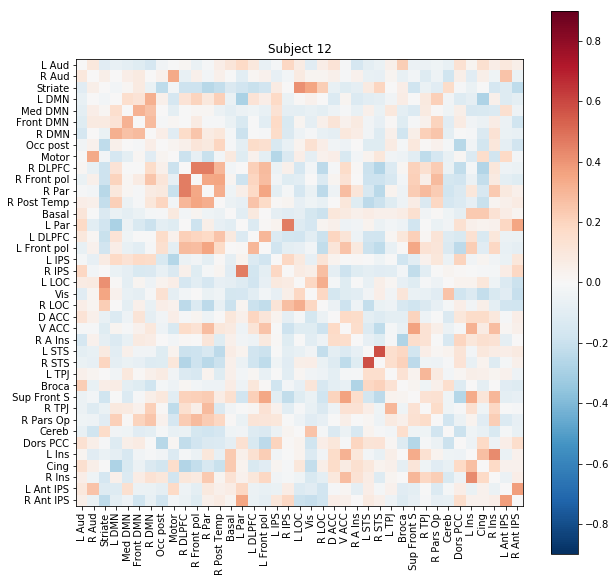

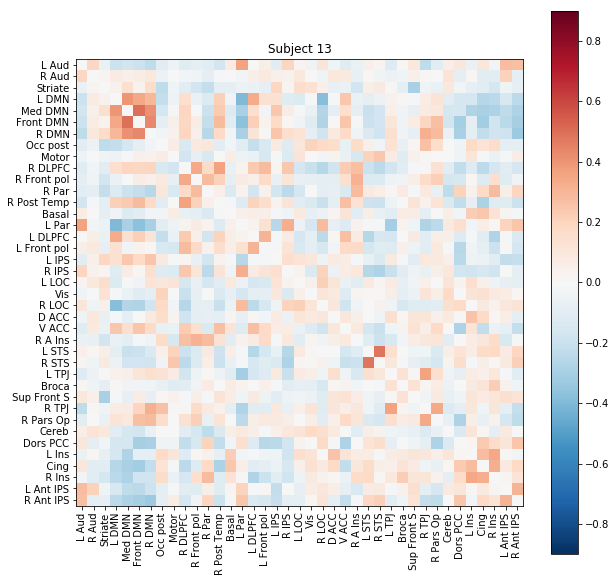

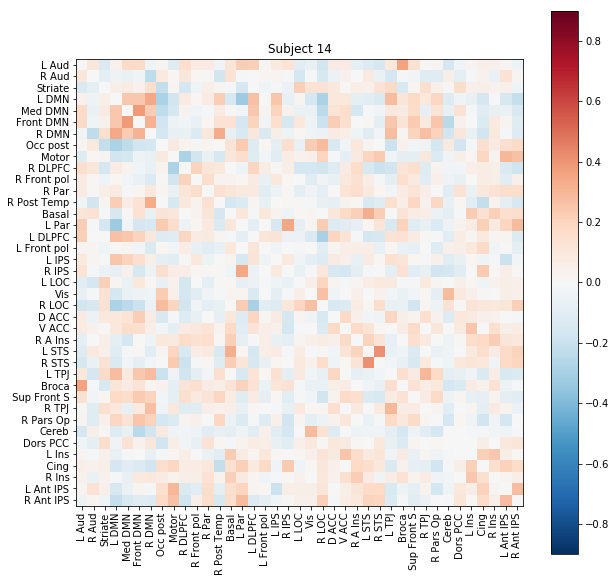

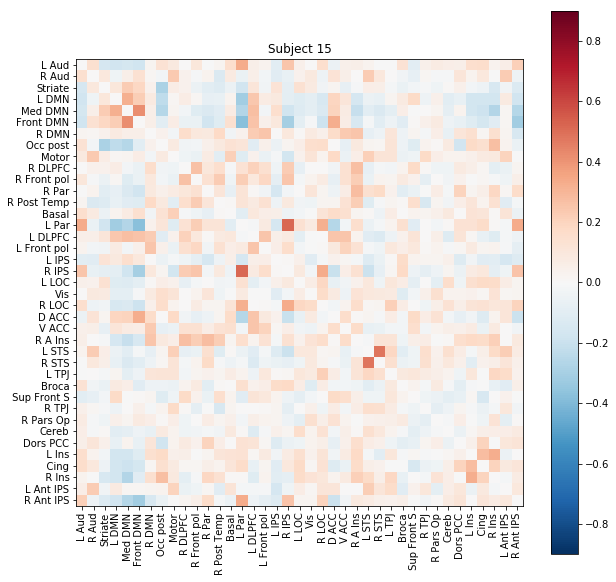

In [20]:
# Make a masker
masker = NiftiMapsMasker(maps_img=atlas_im, standardize=True, memory='nilearn_cache', memory_level=5)

# Make a list to fill up with correlation matrices
correlation_matrices = []


# Loop over 26 subjects
for subj_idx in subjects:
    
    print('Working on subject {}'.format(subj_idx))
    timeseries = []
    
    # loop over the 2 runs
    for run in ['01', '02']:
        
        # Make the path belonging to this subject and run
        path = os.path.join(os.environ['HOME'], 'data/openfmri/ds102/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-flankertask'.format(**locals()))

        data = path + '_run-{}_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'.format(run)

        
        # Get the filenames that contain confounds
        confounds = path + '_run-{}_bold_confounds.tsv'.format(run)
        
        # Read the confounds in, replace the nans with nearest values
        confounds = pandas.read_csv(confounds, sep='\t', na_values='n/a').fillna(method='bfill')


        # Extract timeseries for every mask in the atlas
        ts = masker.fit_transform(data, confounds=confounds.values)
        timeseries.append(ts)
    
    
    # Create a correlation matrix for the two 
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = np.mean(correlation_measure.fit_transform(timeseries), 0)
    plot_correlation_matrix(correlation_matrix)
    plt.title('Subject {}'.format(subj_idx))
    
    correlation_matrices.append(correlation_matrix)

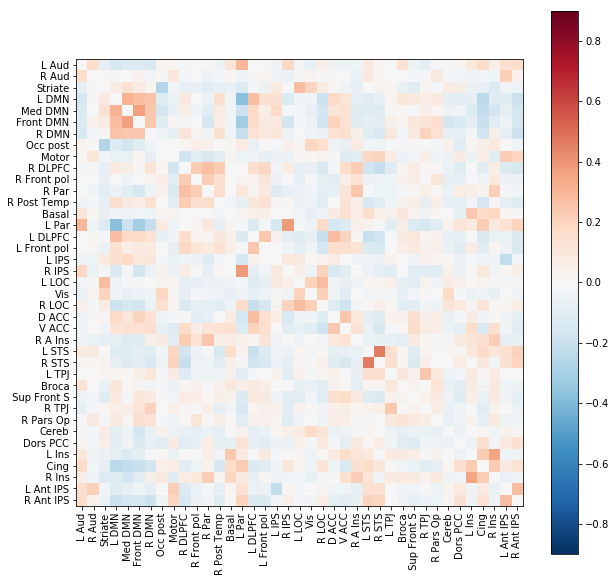

In [21]:
plot_correlation_matrix(np.mean(correlation_matrices, 0))

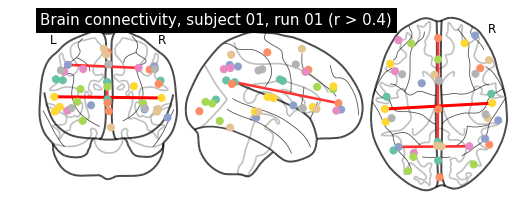

In [22]:
correlation_matrix = np.ma.masked_array(np.mean(correlation_matrices, 0), np.abs(correlation_matrix) < 0.4)
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01 (r > 0.4)')

In [24]:
import pandas
ssrts = pandas.read_csv('ssrts.csv')
ssrts.head()

,Unnamed: 0,subj_idx,tag,node,mean
0,mu_stop_subj.01,1,(),mu_stop_subj.01,109.111171
1,mu_stop_subj.02,2,(),mu_stop_subj.02,109.445961
2,mu_stop_subj.03,3,(),mu_stop_subj.03,126.884125
3,mu_stop_subj.04,4,(),mu_stop_subj.04,97.806734
4,mu_stop_subj.05,5,(),mu_stop_subj.05,125.491647


In [25]:
import scipy as sp
from scipy import stats

In [26]:
def correlation_across_connectivity_matrics(y, X):
    n = X.shape[1]

    X = X.reshape((X.shape[0], -1))
    Xm = X.mean(0)
    ym = y.mean()

    r_num = ((X-Xm)*y[:, np.newaxis]).sum(0)
    r_den = np.sqrt(np.sum((X-Xm)**2,axis=0)*np.sum((y-ym)**2))
    
    r = r_num/r_den
    r = r.reshape((n, n))

    dof = X.shape[0] - 2

    t = (r * np.sqrt(dof)) / np.sqrt(1- r**2)

    p = 2 * sp.stats.t(dof).sf(t)
    
    return r, p

In [27]:
np.array(ssrts['mean']).shape

(14,)

In [28]:
np.array(correlation_matrices).shape

(14, 39, 39)

In [29]:
r, p = correlation_across_connectivity_matrics(np.array(ssrts['mean']), np.array(correlation_matrices))

/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


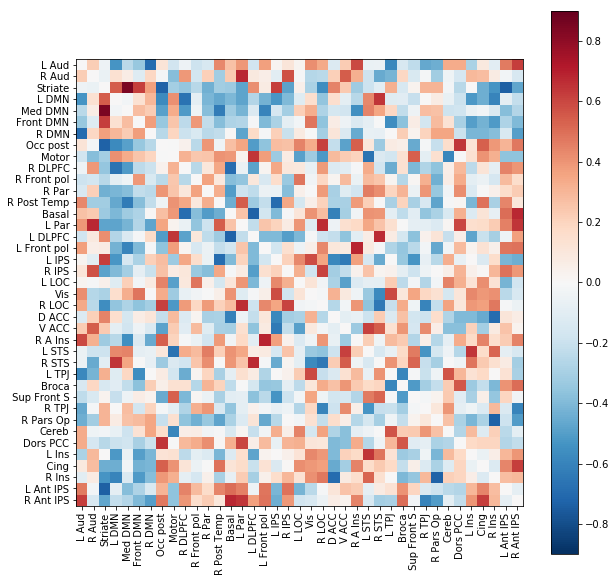

In [30]:
plot_correlation_matrix(r)

/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


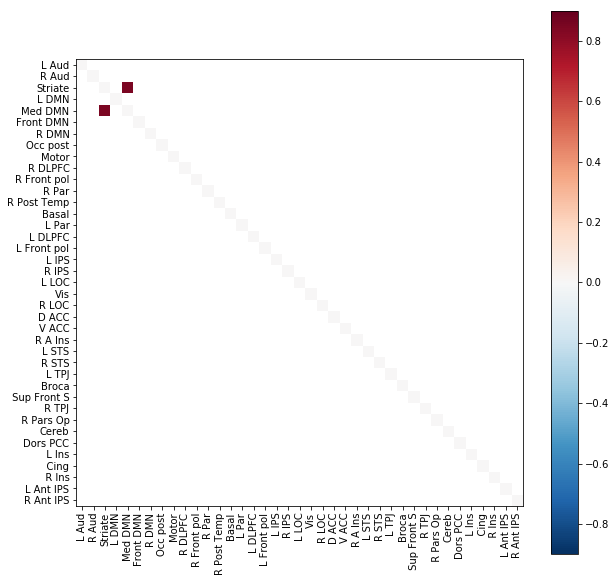

In [31]:
plot_correlation_matrix(np.ma.masked_array(r, p > 0.005))

/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


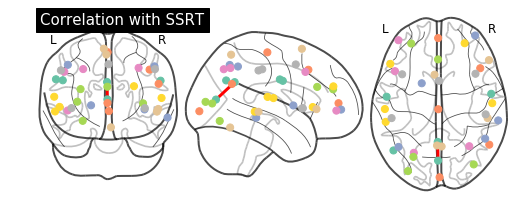

In [32]:
plotting.plot_connectome(np.ma.masked_array(r, p > 0.005), coords_connectome, title='Correlation with SSRT', )

In [33]:
labels

['L Aud',
 'R Aud',
 'Striate',
 'L DMN',
 'Med DMN',
 'Front DMN',
 'R DMN',
 'Occ post',
 'Motor',
 'R DLPFC',
 'R Front pol',
 'R Par',
 'R Post Temp',
 'Basal',
 'L Par',
 'L DLPFC',
 'L Front pol',
 'L IPS',
 'R IPS',
 'L LOC',
 'Vis',
 'R LOC',
 'D ACC',
 'V ACC',
 'R A Ins',
 'L STS',
 'R STS',
 'L TPJ',
 'Broca',
 ' Sup Front S',
 ' R TPJ',
 '  R Pars Op',
 'Cereb',
 'Dors PCC',
 '  L Ins',
 '    Cing',
 '   R Ins',
 'L Ant IPS',
 'R Ant IPS']

In [34]:
nilearn.image.index_img(atlas_filename, labels.index('R DLPFC'))